In [ ]:
%pip install gdown

In [4]:
import gdown
import zipfile
import os

# Google Drive 공유 링크
url = "https://drive.google.com/file/d/1Gyk5STLl_ghJ81FS90NynAPOGc_ojSR0/view?usp=drive_link"

# gdown이 이해할 수 있는 ID 형식으로 변환
file_id = url.split("/d/")[1].split("/")[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# 저장할 파일 이름
output = "downloaded_file.zip"

# 1. 구글 드라이브에서 다운로드
print("🔽 파일 다운로드 중...")
gdown.download(download_url, output, quiet=False)

# 2. 압축 해제 (zip 파일일 경우)
extract_dir = "extracted_files"
os.makedirs(extract_dir, exist_ok=True)

print("📦 압축 해제 중...")
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ 압축 해제 완료! 경로: {os.path.abspath(extract_dir)}")


🔽 파일 다운로드 중...


Downloading...
From: https://drive.google.com/uc?id=1Gyk5STLl_ghJ81FS90NynAPOGc_ojSR0
To: c:\python_src2\pandas-data-analysis\part7\downloaded_file.zip
100%|██████████| 16.8M/16.8M [00:00<00:00, 28.4MB/s]


📦 압축 해제 중...
✅ 압축 해제 완료! 경로: c:\python_src2\pandas-data-analysis\part7\extracted_files


In [10]:
import pandas as pd
import numpy as np
train = pd.read_csv('./extracted_files/open/train.csv')
# 정수형 변환 함수
import re
def extraced_and_convert_to_int(data):
    numbers = re.findall(r'\d+',str(data))
    return int(numbers[0]) if numbers else np.nan
train['가해운전자 연령'] = train['가해운전자 연령'].apply( extraced_and_convert_to_int )
train['피해운전자 연령'] = train['피해운전자 연령'].apply( extraced_and_convert_to_int )

In [ ]:
train.head()

In [15]:
# 데이터 기초 탐색  데이터의 크기, 구조, 결측치, 중복값,기술통계량, 고유값
def wrangling(train_set):
    print('---shape---')
    display(train_set.shape)

    print('-- info --')
    display(train_set.info())

    print('----nan----')
    display(train_set.isna().sum())

    print('--- duplication ---')
    display(train_set[train_set.duplicated()])

    print('--description--')
    display(train_set.describe())

    print('---unique---')
    display(train_set.nunique()) # type: ignore

wrangling(train)

---shape---


(39609, 23)

-- info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           39609 non-null  object 
 1   사고일시         39609 non-null  object 
 2   요일           39609 non-null  object 
 3   기상상태         39609 non-null  object 
 4   시군구          39609 non-null  object 
 5   도로형태         39609 non-null  object 
 6   노면상태         39609 non-null  object 
 7   사고유형         39609 non-null  object 
 8   사고유형 - 세부분류  39609 non-null  object 
 9   법규위반         39609 non-null  object 
 10  가해운전자 차종     39609 non-null  object 
 11  가해운전자 성별     39609 non-null  object 
 12  가해운전자 연령     38615 non-null  float64
 13  가해운전자 상해정도   39609 non-null  object 
 14  피해운전자 차종     38618 non-null  object 
 15  피해운전자 성별     38618 non-null  object 
 16  피해운전자 연령     38549 non-null  float64
 17  피해운전자 상해정도   38618 non-null  object 
 18  사망자수         39609 non-null  int64 

None

----nan----


ID                0
사고일시              0
요일                0
기상상태              0
시군구               0
도로형태              0
노면상태              0
사고유형              0
사고유형 - 세부분류       0
법규위반              0
가해운전자 차종          0
가해운전자 성별          0
가해운전자 연령        994
가해운전자 상해정도        0
피해운전자 차종        991
피해운전자 성별        991
피해운전자 연령       1060
피해운전자 상해정도      991
사망자수              0
중상자수              0
경상자수              0
부상자수              0
ECLO              0
dtype: int64

--- duplication ---


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO


--description--


,가해운전자 연령,피해운전자 연령,사망자수,중상자수,경상자수,부상자수,ECLO
count,38615.000000,38549.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,47.906176,44.699655,0.007776,0.262365,1.070085,0.126865,4.726704
std,16.060277,16.968567,0.090109,0.500845,0.992034,0.394670,3.207206
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,31.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,50.000000,45.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,60.000000,58.000000,0.000000,0.000000,1.000000,0.000000,6.000000
max,98.000000,98.000000,2.000000,6.000000,22.000000,10.000000,74.000000


---unique---


ID             39609
사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          87
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          95
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

In [27]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

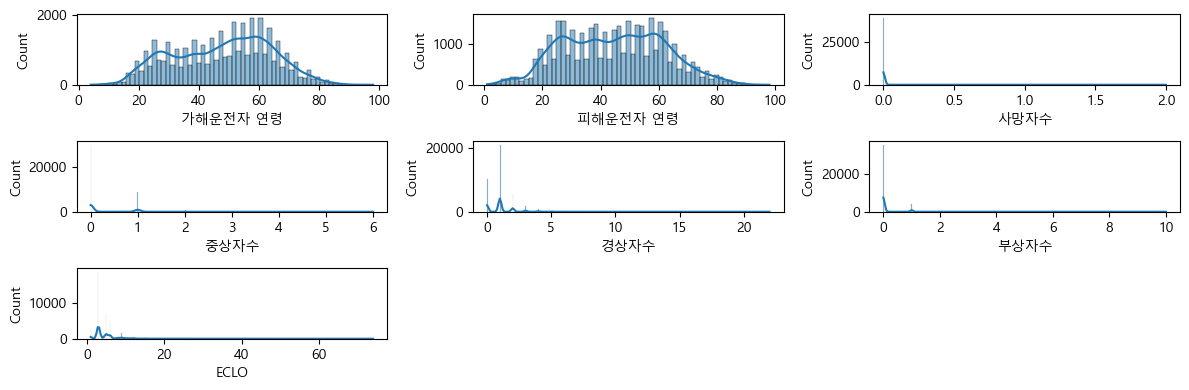

In [28]:
# 수치적 특성
#문자열 데이터가 아닌 칼럼만 모인 리스트 num_cols를 이용해서 각 컬럼별 분포를 확인
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = train.select_dtypes(exclude='object').columns.to_list()
plt.figure(figsize=(12,4))

for i,col in enumerate(num_cols):    
    plt.subplot(3,3,i+1)
    sns.histplot(train[col],kde=True )
plt.tight_layout()

<module 'seaborn.palettes' from 'c:\\python_src2\\.venv\\Lib\\site-packages\\seaborn\\palettes.py'>

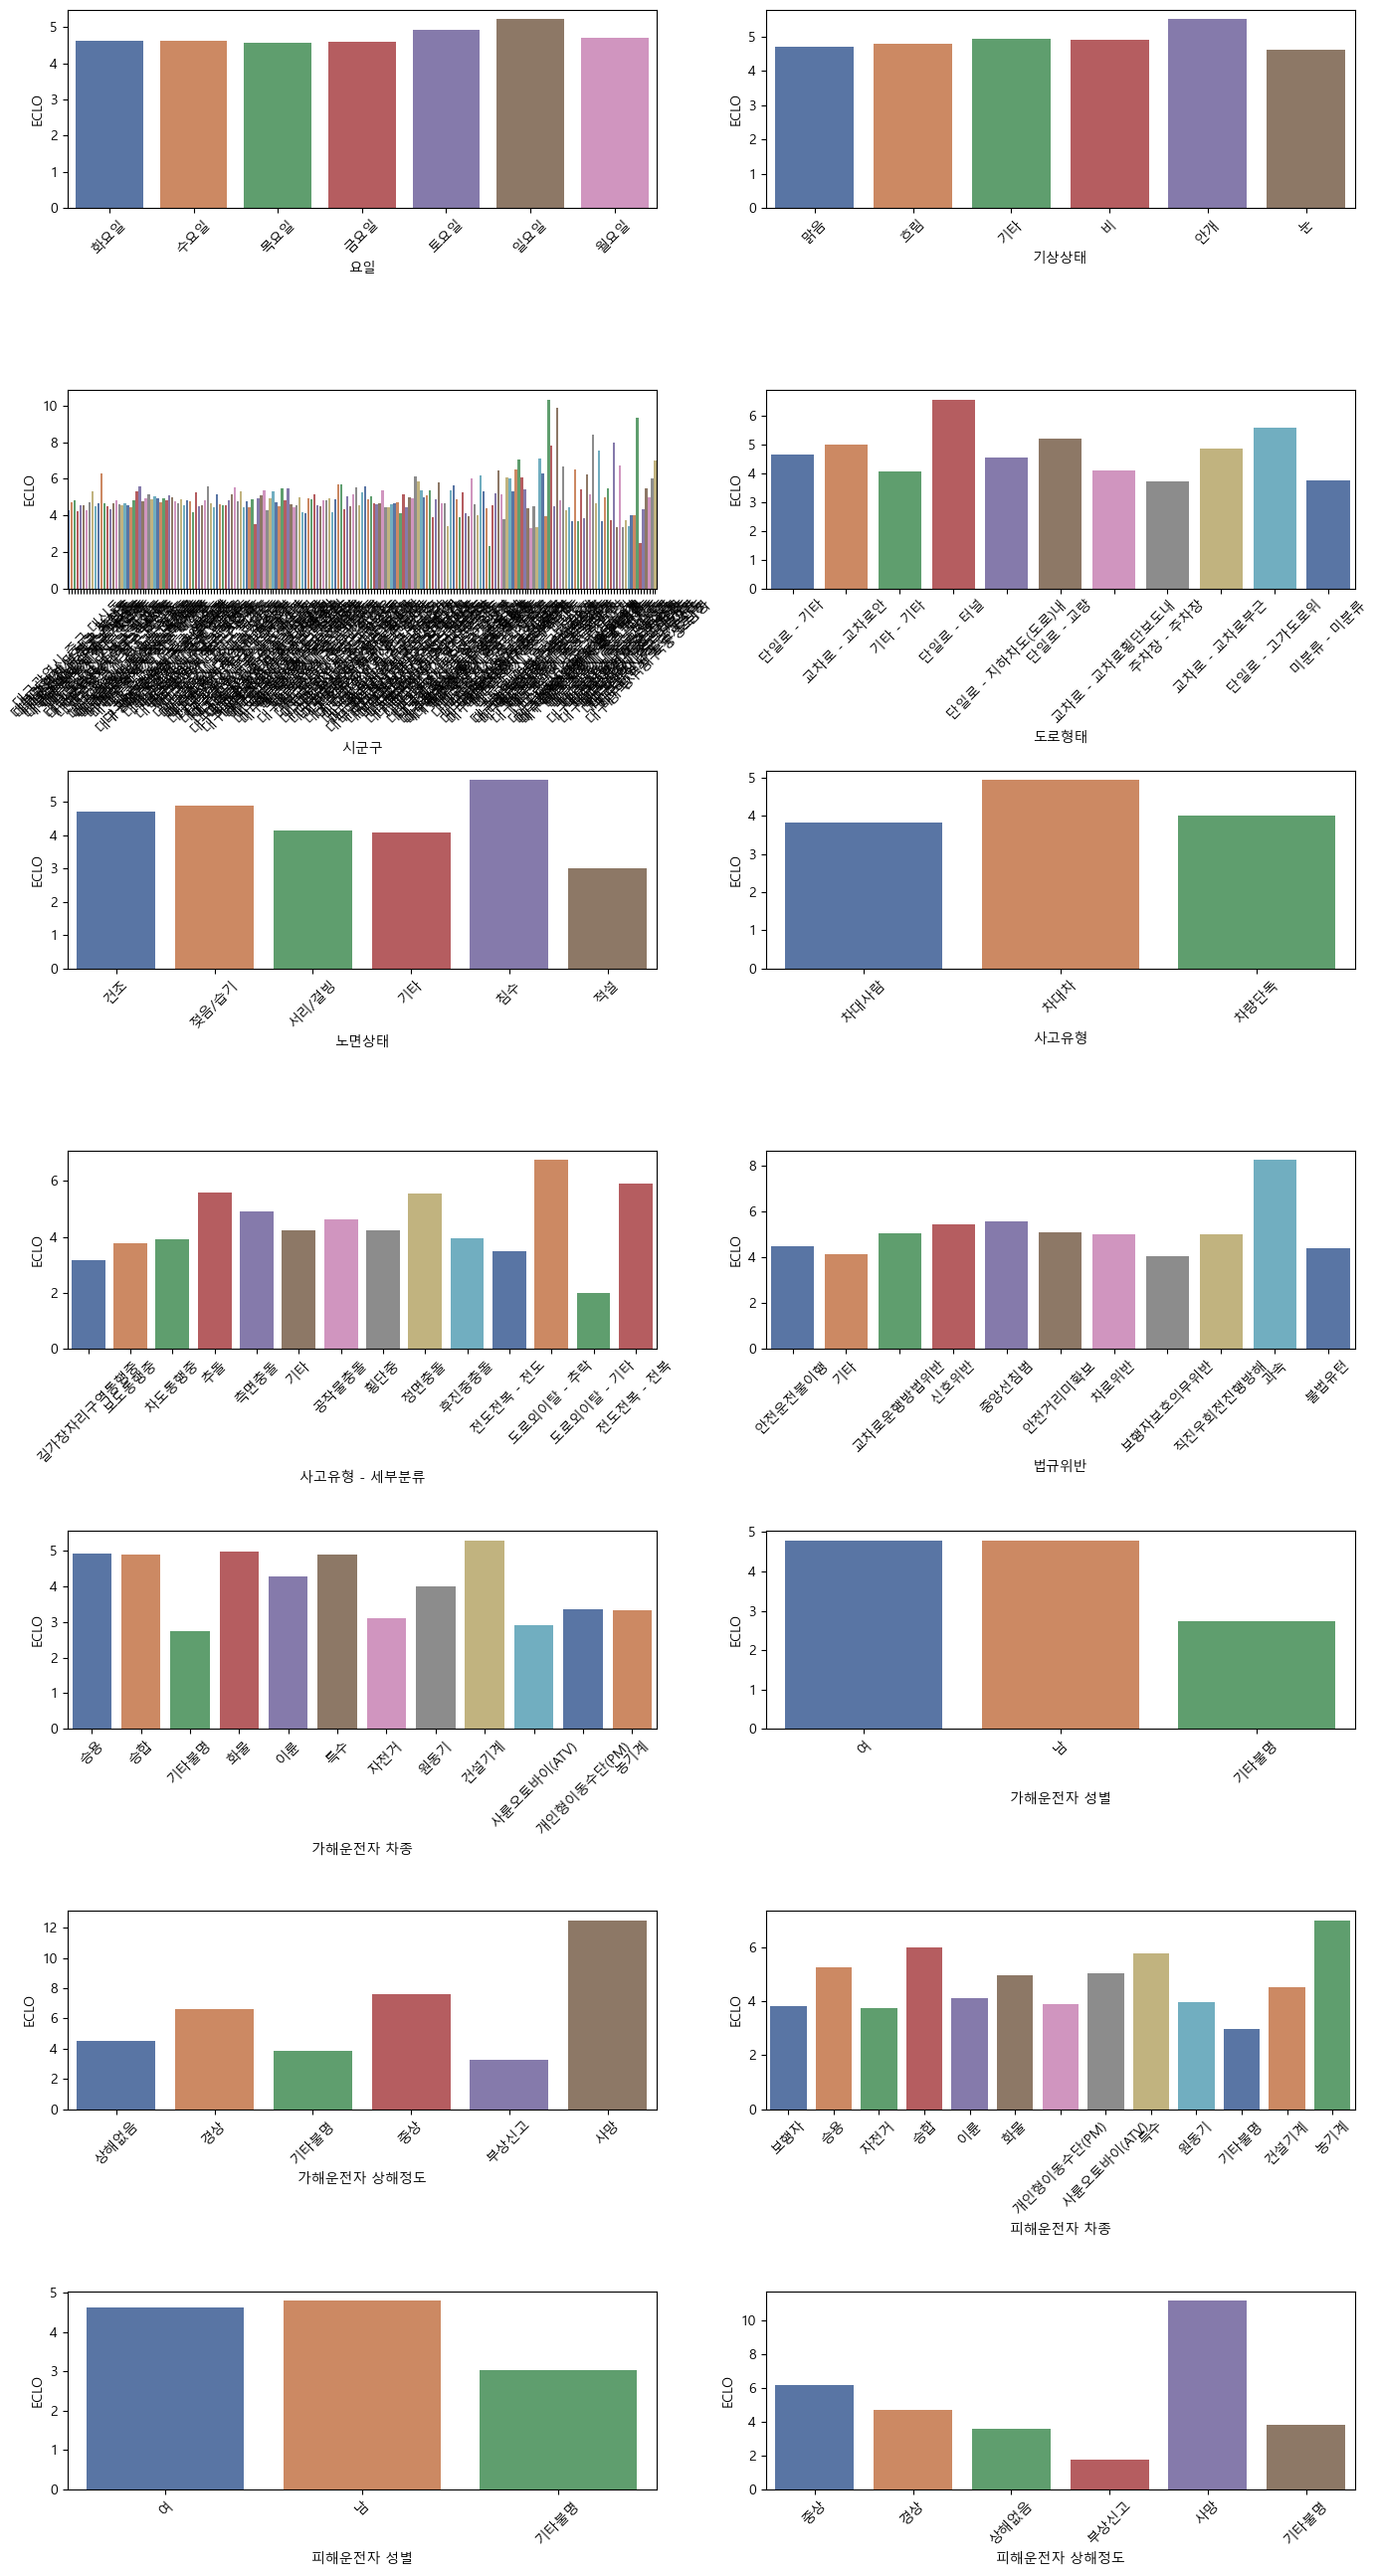

In [50]:
# 범주형 데이터 확인
plt.figure(figsize=(14,26))
category_cols = train.select_dtypes(include='object').columns[2:]
for i, col in enumerate(category_cols):
    plt.subplot(7,2,i+1)
    sns.barplot(data=train, x=col,y='ECLO',hue=col,errorbar=None,palette='deep',legend=False)
    plt.xticks(rotation=45)
plt.tight_layout()    
sns.palettes

In [53]:
# 사고지역(시 군구) 와 인명피해 심각도ELCO 관계탐색
# 시군구별로 ECLO값의 평균을 계산 상위10 하위 10개의 시군구를 출력
num_by_region = train.groupby(['시군구'])['ECLO'].mean().sort_values(ascending=False)
print('top 10')
display(num_by_region[:10])
print()
print('lower 10')
display(num_by_region[-10:])

top 10


시군구
대구광역시 북구 노곡동    10.333333
대구광역시 동구 덕곡동     9.875000
대구광역시 중구 대안동     9.333333
대구광역시 동구 내동      8.400000
대구광역시 중구 하서동     8.000000
대구광역시 동구 진인동     7.823529
대구광역시 동구 둔산동     7.571429
대구광역시 북구 조야동     7.120000
대구광역시 동구 송정동     7.071429
대구광역시 북구 도남동     7.000000
Name: ECLO, dtype: float64


lower 10


시군구
대구광역시 중구 서성로1가    3.666667
대구광역시 중구 삼덕동1가    3.511013
대구광역시 중구 향촌동      3.400000
대구광역시 중구 수창동      3.392857
대구광역시 중구 화전동      3.333333
대구광역시 중구 북성로1가    3.333333
대구광역시 중구 서성로2가    3.333333
대구광역시 동구 미대동      3.300000
대구광역시 중구 종로2가     2.500000
대구광역시 중구 동일동      2.333333
Name: ECLO, dtype: float64

In [59]:
# 사고지역(구 동) 와 인명피해 심각도ELCO 관계탐색
# 구별 상위10  동별 상위10  nlargest(10)
train['구'] = train['시군구'].str.split(" ",expand=True)[1]
train['동'] = train['시군구'].str.split(" ",expand=True)[2]

display(train.groupby(['구'])['ECLO'].mean().nlargest(10)  )
display(train.groupby(['동'])['ECLO'].mean().nlargest(10)  )


구
달성군    5.072280
동구     4.889534
서구     4.775680
수성구    4.727300
북구     4.687669
남구     4.623681
달서구    4.618441
중구     4.541610
Name: ECLO, dtype: float64

동
노곡동    10.333333
덕곡동     9.875000
대안동     9.333333
내동      8.400000
하서동     8.000000
진인동     7.823529
둔산동     7.571429
조야동     7.120000
송정동     7.071429
도남동     7.000000
Name: ECLO, dtype: float64

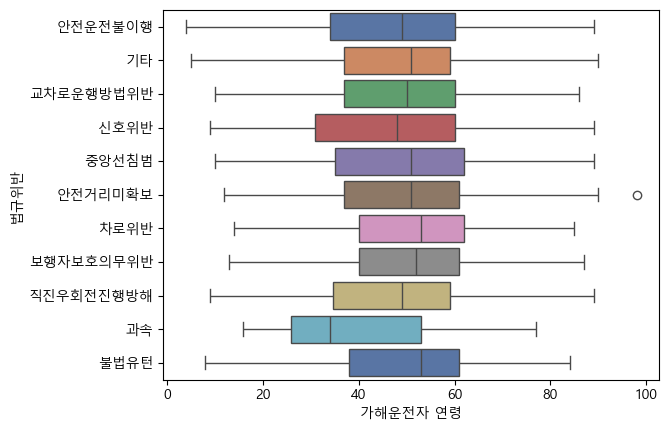

In [62]:
# 가해 운전자 연령  과 법규위반 유형간의 관계   boxplot
sns.boxplot(data=train,x='가해운전자 연령', y='법규위반', hue = '법규위반', palette='deep')
plt.show()


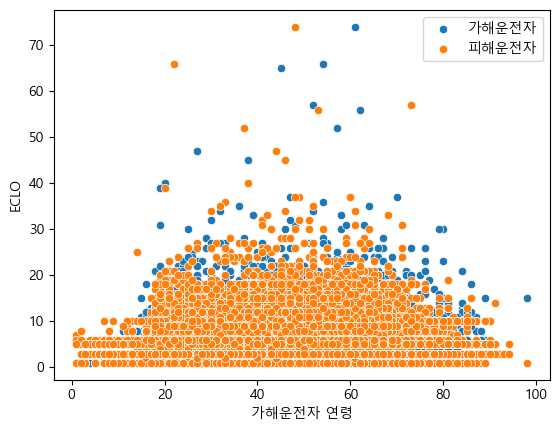

In [69]:
# 가해 운전자, 피해 운전자의 연령과 인명 피해 심각도(ECLO)의 관계 분석
# 가설  가해운전자 또는 피해운전자의 연령이 높을수도록 더 높은 ECLO  --> X
sns.scatterplot(data=train,x='가해운전자 연령', y='ECLO',label='가해운전자')
sns.scatterplot(data=train,x='피해운전자 연령', y='ECLO',label='피해운전자')
plt.show()
# 나이와 ECLO 는 관계가 없다

In [ ]:
# 타겟변수 ECLO에 대한 연도 월 시간별 시계열 그래프 확인 분석
# 가설1  년도가 증가할수록 ECLO 낮을거 같다
# 가설2  공휴일에는 ECLO 높은거 같다      
# 가설2  공휴일에는 ECLO 높은거 같다
# 가설3  출퇴근 시간에 ECLO 높은거 같다

# 사고일시  컬럼에서 년도 월 일 시간을 분류해서 추가
# 년도   line
# 월  bar
# 시간  line



